In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
from sklearn.manifold import TSNE

from esn_lib.esn import *
from esn_lib.hubesn import *
from esn_tasks.mackey_glass.mackey import *

# Eigenvalue

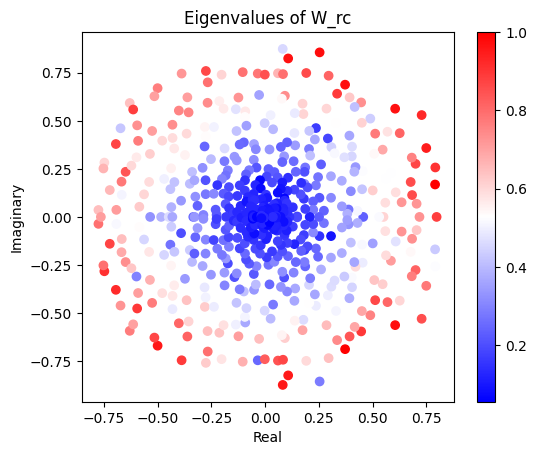

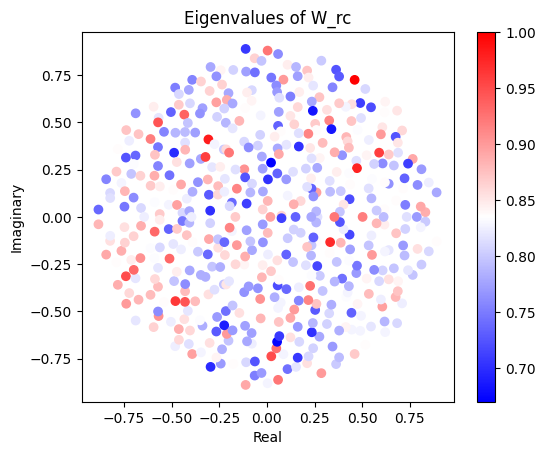

In [2]:
params = {
    "p2": 0.2,
    "lambda_dc": 0.8, # distance constraint
    "lambda_sc": 0.8, # sequence constraint
    "lambda_hc": 0, # hebbian constraint
    "input_neurons": "hub",
    "r_sig": 0.1,
    "n_size": 500,
    "in_features": 1,
    "in_scale": 1,
    "activation": "tanh",
    "spec_rad": 0.9,
    "lr": 0.5,
    "nonhub_type": "out",
    "verbose": False
}
hubesn = HubESN(**params)
# hubesn.plot_degree_dist()
# esn.plot_weight_dist()
# esn.print_layer()
hubesn.plot_eigen()

esn = ESN(**params)
# esn.plot_degree_dist()
# esn.plot_weight_dist()
# esn.print_layer()
esn.plot_eigen()

# Accuracy +- std and Functional Segregation

In [3]:
task_pm = {
    'n_train': 500,
    'n_test': 1000,
    'tau': 17,
    'delay': 1,
    'include_tau': False
}

task = MackeyGlass(**task_pm)
X_train, y_train, X_test, y_test = task.get_data()

In [4]:
repeat = 30
acc = np.zeros(repeat)
for i in range(repeat):
    hubesn = HubESN(**params)
    hubesn.fit(X_train, y_train)
    y_pred, _ = hubesn.predict(X_test)
    acc[i] = task.eval(y_pred, y_test)

print("Accuracy: {:.2f} +/- {:.2f}".format(acc.mean(), acc.std()))

Accuracy: 0.11 +/- 0.06


In [5]:
repeat = 30
acc = np.zeros(repeat)
for i in range(repeat):
    esn = ESN(**params)
    esn.fit(X_train, y_train)
    y_pred, _ = esn.predict(X_test)
    acc[i] = task.eval(y_pred, y_test)

print("Accuracy: {:.2f} +/- {:.2f}".format(acc.mean(), acc.std()))

Accuracy: 0.16 +/- 0.06


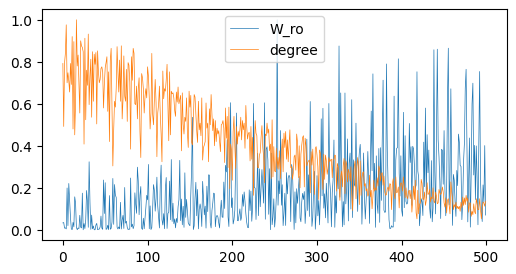

In [8]:
model = hubesn
w_ro = np.mean(np.abs(model.W_ro), axis=0)
deg = np.count_nonzero(model.W_rc, axis=1)

# normalize
w_ro = w_ro / np.max(w_ro)
deg = deg / np.max(deg)

plt.figure(figsize=(6, 3))
plt.plot(w_ro, label="W_ro", alpha=1, linewidth=0.5)
plt.plot(deg, label="degree", alpha=1, linewidth=0.5)
plt.legend()

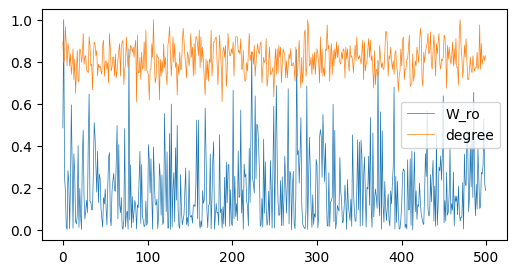

In [12]:
model = esn
w_ro = np.mean(np.abs(model.W_ro), axis=0)
deg = np.count_nonzero(model.W_rc, axis=1)

# normalize
w_ro = w_ro / np.max(w_ro)
deg = deg / np.max(deg)

plt.figure(figsize=(6, 3))
plt.plot(w_ro, label="W_ro", alpha=1, linewidth=0.5)
plt.plot(deg, label="degree", alpha=1, linewidth=0.5)
plt.legend()

# TSNE

In [14]:
hubesn = HubESN(**params)
hubesn.fit(X_train, y_train)
y_pred, hub_states = hubesn.predict(X_test)

In [15]:
tsne = TSNE(n_components=3, random_state=0)
hub_manifold = tsne.fit_transform(hub_states.T)

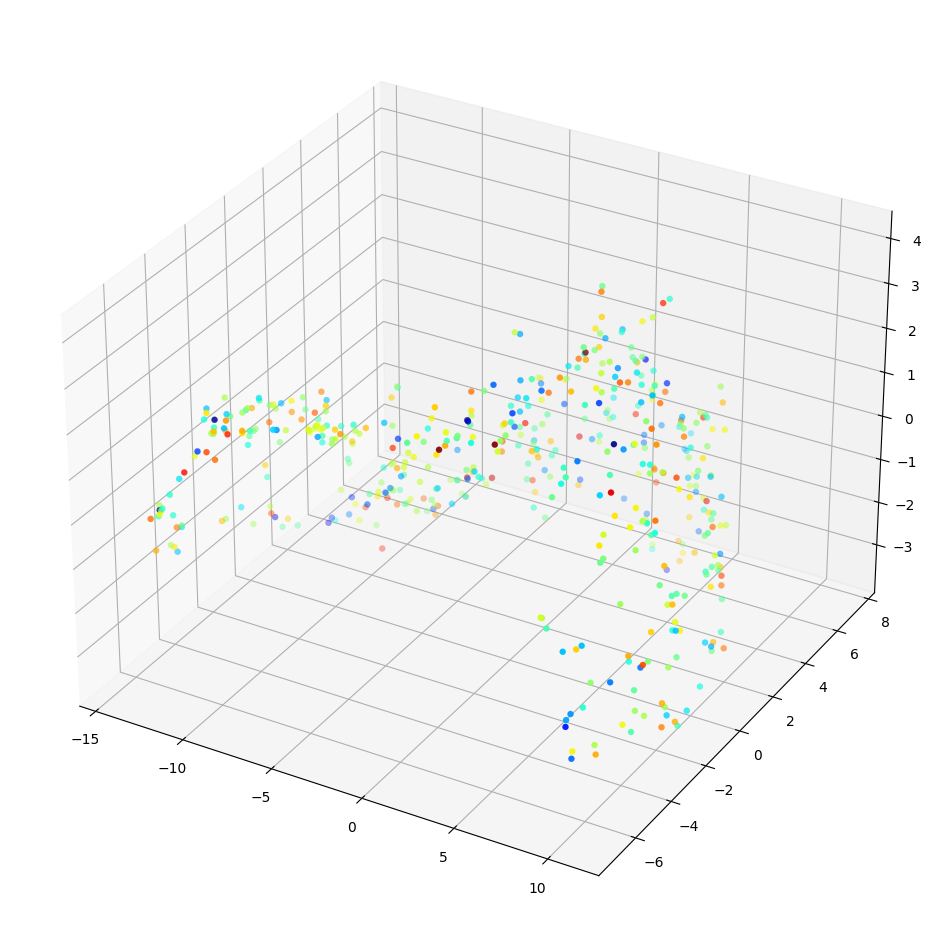

In [16]:
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.scatter3D(hub_manifold[:, 0], hub_manifold[:, 1], hub_manifold[:, 2], c=deg, cmap='jet', linewidth=0.1)
plt.show()